### Importing Libraries

In [61]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
warnings.simplefilter("ignore")


### Loading Dataset

In [62]:
## Load Dataset
df = pd.read_csv('Project Parking Data 2.csv')

df.shape


(380639, 8)

In [63]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original
0,0,NaN,0:15,1,North Crescent,1485,1-Jan-2019,1-Jan-2019
1,0,NaN,0:19,16,Anne Street,1456,1-Jan-2019,1-Jan-2019
2,0,NaN,0:19,25,Celebration Avenue,1252,1-Jan-2019,1-Jan-2019
3,0,NaN,0:20,01o,Honour Lea Avenue,1313,1-Jan-2019,1-Jan-2019
4,0,NaN,0:22,62,Warton Road,1456,1-Jan-2019,1-Jan-2019


## Data Preprocessing

- Dates have been divided into quarters manually for better clustering results.

### Keeping just hour of the time feature 
i.e. 

12:10 = 12

19:50 = 19

In [64]:
df['Issue Time'] = df['Issue Time'].str.split(':').str[0]
df.head(),df.shape


(  Make Colour Issue Time Contravention Code            Location PA_Details  \
 0    0    NaN          0                  1      North Crescent       1485   
 1    0    NaN          0                 16         Anne Street       1456   
 2    0    NaN          0                 25  Celebration Avenue       1252   
 3    0    NaN          0                01o   Honour Lea Avenue       1313   
 4    0    NaN          0                 62         Warton Road       1456   
 
    Issue Date Issue Date Original  
 0  1-Jan-2019          1-Jan-2019  
 1  1-Jan-2019          1-Jan-2019  
 2  1-Jan-2019          1-Jan-2019  
 3  1-Jan-2019          1-Jan-2019  
 4  1-Jan-2019          1-Jan-2019  ,
 (380639, 8))

In [65]:
df['Contravention Code'].unique().shape

(136,)

In [66]:
df['Contravention Code'].unique()

array(['1', '16', '25', '01o', '62', '40', '165', '99', '14', 'W23',
       'W01', 'W61', 'W63', '21', '12', '19', '01a', '6', '27', '11u',
       '30', '54', '26', '73u', '82u)', '01o)', '2', '83', '73', '165)',
       '45', '11u)', '47', '80', '92', '87', '28', '48', '5', 'W12', '91',
       '62g', '82', '23g', '86', 'W02', '05u', '23c', '11', '85', '82u',
       '95', '8', '35', 'W62', '22', '10', '62g)', '80u', 'W27', 'W87',
       '61', 'W21', '71', 'W26', 'W11', '81', 'W06', '49', '23', '20',
       'W57', 'W19', 'W45', 'W47', '55', 'W01A', 'W25', 'W20', 'W93',
       '24', 'W24', '43', '70', '23r', 'W41', 'W04', '9', 'W16', 'W05',
       'W30', 'W92', '61g)', 'W48', 'W14', 'W73', 'W91', 'W31', 'W49',
       '96', '56', 'W95', 'W46', '23s', 'W40', 'W99', '18', '4', '63',
       'W82', 'W22', '73u)', 'W89', '61g', 'W09', 'W83', 'W08', '23e',
       '164', 'W35', '23d', '93', 'W70', 'W55', 'W56', '7', '89', '232',
       '23p', '5u)', 'W42', 'W10', '36', 'W54', '57', 'W90'], dtype=

### Dropping Contravention codes which contains 'W'

In [67]:
df = df[~df['Contravention Code'].str.contains('W')]

### Dropping Test Locations

In [68]:
df = df[~df['Location'].str.contains('Test')]

In [69]:
df['Contravention Code'].unique().shape

(81,)

In [70]:
df['Contravention Code'].unique()


array(['1', '16', '25', '01o', '62', '40', '165', '99', '14', '21', '12',
       '19', '01a', '6', '27', '11u', '30', '54', '26', '73u', '82u)',
       '01o)', '2', '83', '73', '165)', '45', '11u)', '47', '80', '92',
       '87', '28', '48', '5', '91', '62g', '82', '23g', '86', '05u',
       '23c', '11', '85', '82u', '95', '8', '35', '10', '62g)', '80u',
       '61', '22', '81', '49', '23', '20', '55', '24', '43', '23r', '71',
       '61g)', '56', '23s', '18', '4', '63', '96', '73u)', '61g', '23e',
       '164', '93', '7', '89', '232', '23p', '5u)', '36', '57'],
      dtype=object)

In [71]:
df['Contravention Code'].unique().shape

(81,)

### Dropping Characters from the Contravention codes to make it a numerical feature.

In [72]:
df['Contravention Code']=df['Contravention Code'].str.replace("u","")
df['Contravention Code']=df['Contravention Code'].str.replace("g","")
df['Contravention Code']=df['Contravention Code'].str.replace("a","")
df['Contravention Code']=df['Contravention Code'].str.replace("c","")
df['Contravention Code']=df['Contravention Code'].str.replace("o","")
df['Contravention Code']=df['Contravention Code'].str.replace(")","")
df['Contravention Code']=df['Contravention Code'].str.replace("d","")
df['Contravention Code']=df['Contravention Code'].str.replace("p","")
df['Contravention Code']=df['Contravention Code'].str.replace("e","")
df['Contravention Code']=df['Contravention Code'].str.replace("s","")
df['Contravention Code']=df['Contravention Code'].str.replace("r","")
df['Contravention Code'].unique()

array(['1', '16', '25', '01', '62', '40', '165', '99', '14', '21', '12',
       '19', '6', '27', '11', '30', '54', '26', '73', '82', '2', '83',
       '45', '47', '80', '92', '87', '28', '48', '5', '91', '23', '86',
       '05', '85', '95', '8', '35', '10', '61', '22', '81', '49', '20',
       '55', '24', '43', '71', '56', '18', '4', '63', '96', '164', '93',
       '7', '89', '232', '36', '57'], dtype=object)

In [73]:
df['Contravention Code'].unique().shape

(60,)

In [74]:
df.shape

(379456, 8)

In [75]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original
0,0,NaN,0,1,North Crescent,1485,1-Jan-2019,1-Jan-2019
1,0,NaN,0,16,Anne Street,1456,1-Jan-2019,1-Jan-2019
2,0,NaN,0,25,Celebration Avenue,1252,1-Jan-2019,1-Jan-2019
3,0,NaN,0,01,Honour Lea Avenue,1313,1-Jan-2019,1-Jan-2019
4,0,NaN,0,62,Warton Road,1456,1-Jan-2019,1-Jan-2019


### Dropping Null values

In [76]:
df.dropna(inplace=True)
df.shape

(375880, 8)

###  Dropping data where Make is 0

In [77]:
df.drop(df.index[df['Make'] == 0], inplace = True)
df.shape

(375880, 8)

### Dropping characters from PA Details to make it a numerical feature.

In [78]:
df['PA_Details']=df['PA_Details'].str.replace("PN","")
df['PA_Details']=df['PA_Details'].str.replace(")","")
df.drop(df.index[df['PA_Details'] == 'icpsadmin'], inplace = True)
df.drop(df.index[df['PA_Details'] == '999999999'], inplace = True)

In [79]:
df['PA_Details'].unique()

array(['1500', '3254', '1498', '3299', '1434', '3260', '1433', '1522',
       '1508', '1435', '3264', '1507', '1518', '3216', '1313', '3288',
       '1524', '1519', '1504', '1318', '1142', '1520', '1306', '3292',
       '3191', '3295', '1247', '1516', '1453', '1521', '1462', '3239',
       '1454', '3293', '1491', '1463', '1456', '1281', '1410', '1438',
       '1510', '1464', '1499', '1458', '1523', '1146', '1514', '3237',
       '3266', '3269', '1485', '1490', '1419', '3298', '1252', '3247',
       '1481', '3328', '1401', '1466', '3326', '1461', '1437', '1473',
       '1387', '1468', '1278', '3272', '1502', '1145', '3289', '3235',
       '1513', '1457', '1409', '3156', '3278', '3301', '1482', '3318',
       '1407', '1517', '3287', '3296', '1503', '3205', '1509', '3275',
       '1492', '1506', '3319', '1495', '1418', '1447', '3285', '1505',
       '1351', '1484', '1331', '1442', '1494', '3316', '1515', '1309',
       '1489', '3327', '1475', '1381', '1478', '3300', '3228', '3303',
      

In [80]:
df.head(20),df.shape

(     Make Colour Issue Time Contravention Code            Location PA_Details  \
 162  Audi  Black          9                 19         Antwerp Way       1500   
 163  Audi  Black         10                 12        First Avenue       3254   
 164  Audi  Black         10                 12       Ingestre Road       1498   
 165  Audi  Black         10                 12    Lawrence Road E6       3299   
 166  Audi  Black         10                 12     Napier Road E15       1434   
 167  Audi  Black         10                 19    Biggerstaff Road       3260   
 168  Audi  Black         10                 19        Grant Street       3299   
 169  Audi  Black         10                 19          Kings Road       1433   
 170  Audi  Black         10                 19  Upperton Road West       1522   
 171  Audi  Black         10                 21     Malmesbury Road       1508   
 172  Audi  Black         10                 25      Redclyffe Road       1433   
 173  Audi  Blac

In [81]:
# # Applying the condition

# df['Issue Date'].loc[df['Issue Date'].str.contains('Jan-2019')] = 'Q1Y1'
# df['Issue Date'].loc[df['Issue Date'].str.contains('Feb-2019')] = 'Q1Y1'
# df['Issue Date'].loc[df['Issue Date'].str.contains('Mar-2019')] = 'Q1Y1'
# df['Issue Date'].loc[df['Issue Date'].str.contains('Apr-2019')] = 'Q2Y1'
# df['Issue Date'].loc[df['Issue Date'].str.contains('May-2019')] = 'Q2Y1'
# df['Issue Date'].loc[df['Issue Date'].str.contains('Jun-2019')] = 'Q2Y1'
# df['Issue Date'].loc[df['Issue Date'].str.contains('Jul-2019')] = 'Q3Y1'
# df['Issue Date'].loc[df['Issue Date'].str.contains('Aug-2019')] = 'Q3Y1'
# df['Issue Date'].loc[df['Issue Date'].str.contains('Sep-2019')] = 'Q3Y1'
# df['Issue Date'].loc[df['Issue Date'].str.contains('Oct-2019')] = 'Q4Y1'
# df['Issue Date'].loc[df['Issue Date'].str.contains('Nov-2019')] = 'Q4Y1'
# df['Issue Date'].loc[df['Issue Date'].str.contains('Dec-2019')] = 'Q4Y1'

In [82]:
df.iloc[74000:74015,: ]

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original
77437,Mercedes Benz,Other,12,12,Third Avenue E12,1462,3-May-2020,3-May-2020
77438,Mercedes Benz,Other,13,30,Wall End Road,1505,3-May-2020,3-May-2020
77439,Mercedes Benz,Other,13,1,Plashet Road,1433,3-May-2020,3-May-2020
77440,Mercedes Benz,Other,13,12,Caledon Road,1247,3-May-2020,3-May-2020
77441,Mercedes Benz,Other,13,12,Canterbury Close,1456,3-May-2020,3-May-2020
77442,Mercedes Benz,Other,14,62,High Street North,1510,3-May-2020,3-May-2020
77443,Mercedes Benz,Other,14,62,Caxton Street North,1456,3-May-2020,3-May-2020
77444,Mercedes Benz,Other,14,62,Kings Road,1433,3-May-2020,3-May-2020
77445,Mercedes Benz,Other,14,165,Skelton Road,1519,3-May-2020,3-May-2020
77446,Mercedes Benz,Other,14,1,Bendish Road,1517,3-May-2020,3-May-2020


In [83]:
df.tail()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original
380634,Yamaha,White,15,54,Broadway,1485,31/12/2021,31/12/2021
380635,Yamaha,White,16,1,High Street North,3237,31/12/2021,31/12/2021
380636,YAMAHA,WHITE,16,81,Stratford Multi Storey Car Park,1458,31/12/2021,31/12/2021
380637,Yamaha,White,17,62,Westfield Avenue,1475,31/12/2021,31/12/2021
380638,Yamaha,White,17,1,Harold Road,3237,31/12/2021,31/12/2021


### Converting date in meaning quarters notation

In [84]:
# Applying the condition
df['Issue Date'].loc[df['Issue Date'].str.contains('Jan-2019')] = 'Q1Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('Feb-2019')] = 'Q1Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('Mar-2019')] = 'Q1Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('Apr-2019')] = 'Q2Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('May-2019')] = 'Q2Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('Jun-2019')] = 'Q2Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('Jul-2019')] = 'Q3Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('Aug-2019')] = 'Q3Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('Sep-2019')] = 'Q3Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('Oct-2019')] = 'Q4Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('Nov-2019')] = 'Q4Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('Dec-2019')] = 'Q4Y1'

df['Issue Date'].loc[df['Issue Date'].str.contains('01/2019')] = 'Q1Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('02/2019')] = 'Q1Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('03/2019')] = 'Q1Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('04/2019')] = 'Q2Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('05/2019')] = 'Q2Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('06/2019')] = 'Q2Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('07/2019')] = 'Q3Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('08/2019')] = 'Q3Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('09/2019')] = 'Q3Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('10/2019')] = 'Q4Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('11/2019')] = 'Q4Y1'
df['Issue Date'].loc[df['Issue Date'].str.contains('12/2019')] = 'Q4Y1'

# Applying the condition
df['Issue Date'].loc[df['Issue Date'].str.contains('Jan-2020')] = 'Q1Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('Feb-2020')] = 'Q1Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('Mar-2020')] = 'Q1Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('Apr-2020')] = 'Q2Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('May-2020')] = 'Q2Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('Jun-2020')] = 'Q2Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('Jul-2020')] = 'Q3Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('Aug-2020')] = 'Q3Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('Sep-2020')] = 'Q3Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('Oct-2020')] = 'Q4Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('Nov-2020')] = 'Q4Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('Dec-2020')] = 'Q4Y2'

df['Issue Date'].loc[df['Issue Date'].str.contains('01/2020')] = 'Q1Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('02/2020')] = 'Q1Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('03/2020')] = 'Q1Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('04/2020')] = 'Q2Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('05/2020')] = 'Q2Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('06/2020')] = 'Q2Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('07/2020')] = 'Q3Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('08/2020')] = 'Q3Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('09/2020')] = 'Q3Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('10/2020')] = 'Q4Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('11/2020')] = 'Q4Y2'
df['Issue Date'].loc[df['Issue Date'].str.contains('12/2020')] = 'Q4Y2'

# Applying the condition
df['Issue Date'].loc[df['Issue Date'].str.contains('Jan-2021')] = 'Q1Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('Feb-2021')] = 'Q1Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('Mar-2021')] = 'Q1Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('Apr-2021')] = 'Q2Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('May-2021')] = 'Q2Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('Jun-2021')] = 'Q2Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('Jul-2021')] = 'Q3Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('Aug-2021')] = 'Q3Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('Sep-2021')] = 'Q3Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('Oct-2021')] = 'Q4Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('Nov-2021')] = 'Q4Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('Dec-2021')] = 'Q4Y3'

df['Issue Date'].loc[df['Issue Date'].str.contains('01/2021')] = 'Q1Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('02/2021')] = 'Q1Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('03/2021')] = 'Q1Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('04/2021')] = 'Q2Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('05/2021')] = 'Q2Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('06/2021')] = 'Q2Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('07/2021')] = 'Q3Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('08/2021')] = 'Q3Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('09/2021')] = 'Q3Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('10/2021')] = 'Q4Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('11/2021')] = 'Q4Y3'
df['Issue Date'].loc[df['Issue Date'].str.contains('12/2021')] = 'Q4Y3'

In [85]:
len(df["Issue Date"].unique()),df["Issue Date"].unique()

(12,
 array(['Q1Y1', 'Q2Y1', 'Q3Y1', 'Q4Y1', 'Q1Y2', 'Q2Y2', 'Q3Y2', 'Q4Y2',
        'Q1Y3', 'Q2Y3', 'Q3Y3', 'Q4Y3'], dtype=object))

In [86]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original
162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019
163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019
164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019
165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019
166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019


In [87]:
df.tail()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original
380634,Yamaha,White,15,54,Broadway,1485,Q4Y3,31/12/2021
380635,Yamaha,White,16,1,High Street North,3237,Q4Y3,31/12/2021
380636,YAMAHA,WHITE,16,81,Stratford Multi Storey Car Park,1458,Q4Y3,31/12/2021
380637,Yamaha,White,17,62,Westfield Avenue,1475,Q4Y3,31/12/2021
380638,Yamaha,White,17,1,Harold Road,3237,Q4Y3,31/12/2021


In [91]:
df.iloc[214000:214015,: ]

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original
218254,Skoda,Silver,8,21,Halley Road,1519,Q1Y3,18/02/2021
218255,Skoda,Silver,8,19,Wolsey Avenue,1517,Q1Y3,18/02/2021
218256,Skoda,Silver,8,12,Folkestone Road,1490,Q1Y3,18/02/2021
218257,Skoda,Silver,8,1,MacGregor Road,1468,Q1Y3,18/02/2021
218258,Skoda,Silver,8,85,Will Thorne Pavillion_,1485,Q1Y3,18/02/2021
218259,Skoda,Silver,8,12,Katherine Road,3299,Q1Y3,18/02/2021
218260,Skoda,Silver,8,12,Katherine Road,3299,Q1Y3,18/02/2021
218261,Skoda,Silver,8,11,Bedford Road,3292,Q1Y3,18/02/2021
218262,Skoda,Silver,8,12,Litchfield Avenue,1507,Q1Y3,18/02/2021
218263,Skoda,Silver,8,12,Skeffington Road,3285,Q1Y3,18/02/2021


### Converting Type of Numerical features

In [92]:
df['Issue Time']=df['Issue Time'].astype(str).astype(int)
df['Contravention Code']=df['Contravention Code'].astype(str).astype(int)
df['PA_Details']=df['PA_Details'].astype(str).astype(int)

### Saving processed data into csv file

In [93]:
df.to_csv('Processed.csv')

### Dividing data in to numerical and categorical features

In [95]:
df_categorical = df[['Make','Colour',	'Issue Date',	'Location']]
df_numerical = df[['Issue Time','Contravention Code','PA_Details']]

In [96]:
df_categorical.head(), df_numerical.head()

(     Make Colour Issue Date          Location
 162  Audi  Black       Q1Y1       Antwerp Way
 163  Audi  Black       Q1Y1      First Avenue
 164  Audi  Black       Q1Y1     Ingestre Road
 165  Audi  Black       Q1Y1  Lawrence Road E6
 166  Audi  Black       Q1Y1   Napier Road E15,
      Issue Time  Contravention Code  PA_Details
 162           9                  19        1500
 163          10                  12        3254
 164          10                  12        1498
 165          10                  12        3299
 166          10                  12        1434)

In [97]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375869 entries, 162 to 380638
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Issue Time          375869 non-null  int64
 1   Contravention Code  375869 non-null  int64
 2   PA_Details          375869 non-null  int64
dtypes: int64(3)
memory usage: 11.5 MB


# Clustering

## K Means Clustering

### Elbow method to find optimal number of Clusters

Text(0.5, 1.0, 'Elbow Method For Optimal k')

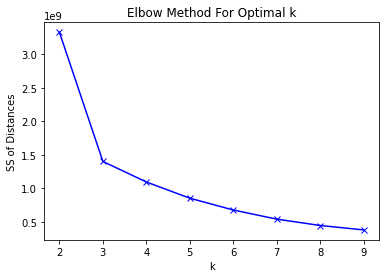

In [98]:
#Finding Best k using WSSE 
from sklearn.cluster import KMeans
SS_distances= []
I = range(2,10)
for i in I:
       k_means = KMeans(n_clusters=i)
       k_means= k_means.fit(df_numerical)
       SS_distances.append(k_means.inertia_)
   
centers = k_means.cluster_centers_

# plotting SSE distances (for each point to the nearest Center) versus number of k 
plt.plot(I, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SS of Distances')
plt.title('Elbow Method For Optimal k')

### 3 is optimal number for clusters in numerical features 

In [99]:
k_means = KMeans(n_clusters=3)
k_means= k_means.fit(df_numerical)
labels = k_means.labels_
np.unique(labels, return_counts=True)

(array([0, 1, 2], dtype=int32), array([241777,  80952,  53140]))

In [100]:
centers=k_means.cluster_centers_

### Plotting data 

### 1. 'Issue Time' and 'Contravention Code'

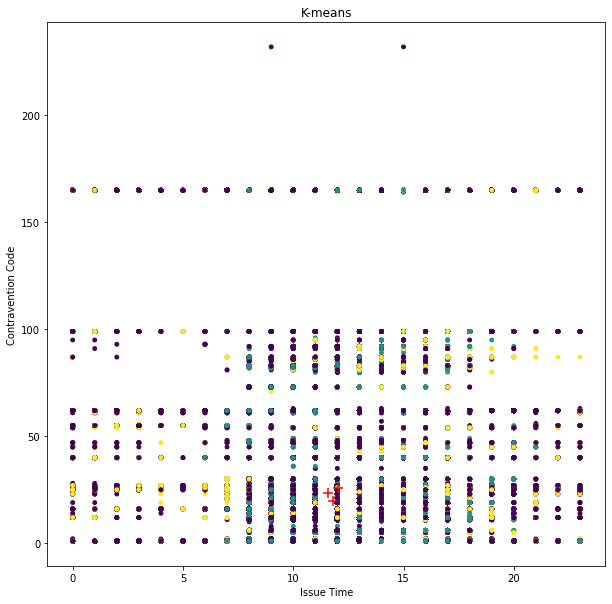

In [101]:
# Plot Clusters and their centers

label = k_means.labels_
centers = k_means.cluster_centers_

plt.figure(figsize=(10,10))
plt.scatter(df_numerical['Issue Time'],df_numerical['Contravention Code'],c=labels,s=15)
plt.scatter(centers[:,0], centers[:,1], color ='red', marker='+', s=100) 
plt.xlabel('Issue Time')
plt.ylabel('Contravention Code')
plt.title('K-means')
plt.show()

### 2. 'Issue Time' and 'PA_Details'

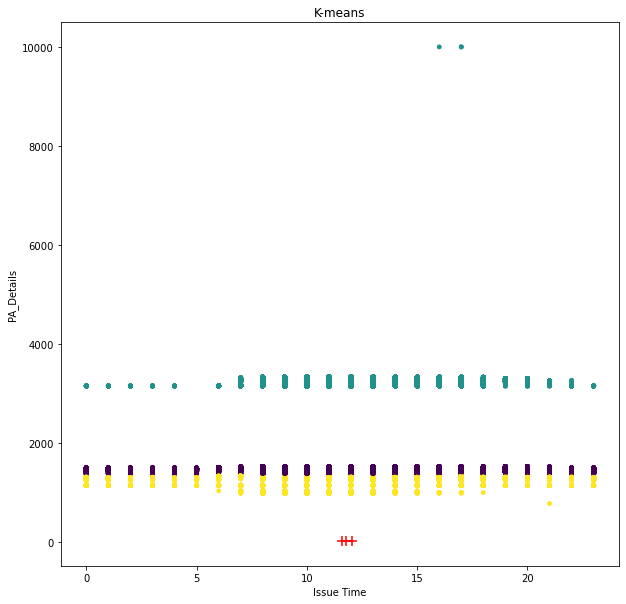

In [102]:


# Plot Clusters and their centers

label = k_means.labels_
centers = k_means.cluster_centers_

plt.figure(figsize=(10,10))
plt.scatter(df_numerical['Issue Time'],df_numerical['PA_Details'],c=labels,s=15)
plt.scatter(centers[:,0], centers[:,1], color ='red', marker='+', s=100) 
plt.ylabel('PA_Details')
plt.xlabel('Issue Time')
plt.title('K-means')
plt.show()

### 3. 'PA_Details' and 'Contravention Code'

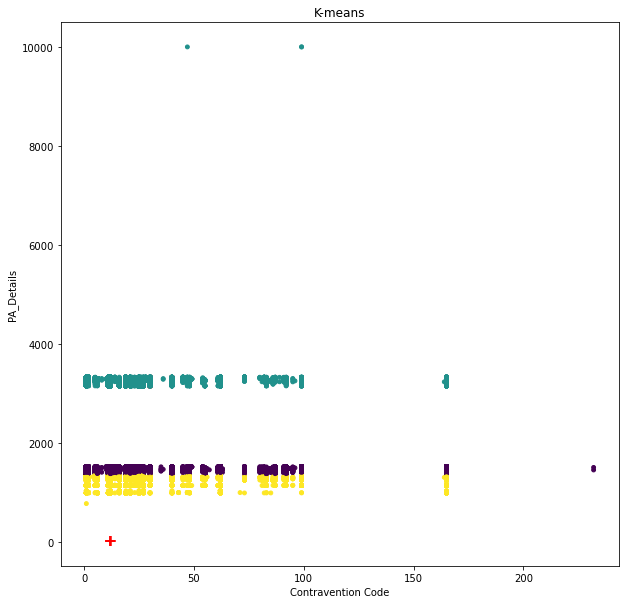

In [103]:
# Plot Clusters and their centers

label = k_means.labels_
centers = k_means.cluster_centers_
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize=(10,10))
plt.scatter(df_numerical['Contravention Code'],df_numerical['PA_Details'],c=labels,s=15)
plt.scatter(centers[:,0], centers[:,1], color ='red', marker='+', s=100) 
plt.ylabel('PA_Details')
plt.xlabel('Contravention Code')
plt.title('K-means')
plt.show()

In [104]:
df_numerical.head()

,Issue Time,Contravention Code,PA_Details
162,9,19,1500
163,10,12,3254
164,10,12,1498
165,10,12,3299
166,10,12,1434


In [105]:
df_numerical.iloc[:,0:3]

,Issue Time,Contravention Code,PA_Details
162,9,19,1500
163,10,12,3254
164,10,12,1498
165,10,12,3299
166,10,12,1434
...,...,...,...
380634,15,54,1485
380635,16,1,3237
380636,16,81,1458
380637,17,62,1475


In [106]:
df_numerical['clusters_k_means'] = labels
df_numerical.head()

,Issue Time,Contravention Code,PA_Details,clusters_k_means
162,9,19,1500,0
163,10,12,3254,1
164,10,12,1498,0
165,10,12,3299,1
166,10,12,1434,0


### Plotting in 2 dimensions by PCA Analysis and reducing dimensions to 2 

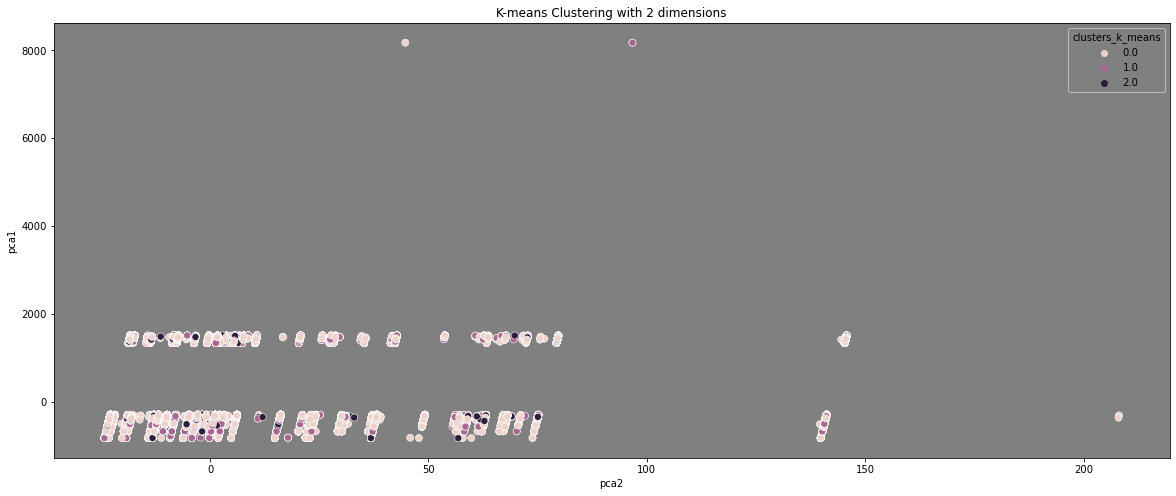

In [107]:
from sklearn.decomposition import PCA
pca_num_components = 2
plt.rcParams['axes.facecolor'] = 'grey'
reduced_data = PCA(n_components=pca_num_components).fit_transform(df_numerical.iloc[:,0:3])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
plt.figure(figsize=(20,8))
sns.scatterplot(x="pca2", y="pca1", hue=df_numerical['clusters_k_means'], data=results,s=50)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

### Visualizing 3-D numeric data with Scatter Plots


Text(0.5, 0, 'PA_Details')

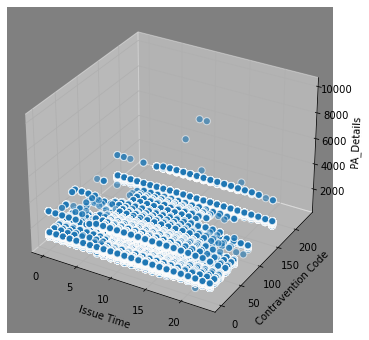

In [108]:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df_numerical['Issue Time']
ys = df_numerical['Contravention Code']
zs = df_numerical['PA_Details']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Issue Time')
ax.set_ylabel('Contravention Code')
ax.set_zlabel('PA_Details')

## K MODES Clustering

In [109]:
# Import module for k-protoype cluster
from kmodes.kmodes import KModes

In [110]:
df_categorical.head()

,Make,Colour,Issue Date,Location
162,Audi,Black,Q1Y1,Antwerp Way
163,Audi,Black,Q1Y1,First Avenue
164,Audi,Black,Q1Y1,Ingestre Road
165,Audi,Black,Q1Y1,Lawrence Road E6
166,Audi,Black,Q1Y1,Napier Road E15


### Elbow Method for optimal number of clusters

In [111]:
# Choosing optimal K
cost = []
for cluster in range(2, 6):
    try:
        kmodes = KModes(n_clusters = cluster)
        kmodes.fit_predict(df_categorical)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(2, 6), 'Cost': cost})

Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5


In [112]:
# Import module for data visualization
from plotnine import *
import plotnine
# Data visualization with matplotlib
import matplotlib.pyplot as plt
# Use the theme of ggplot
plt.style.use('ggplot')

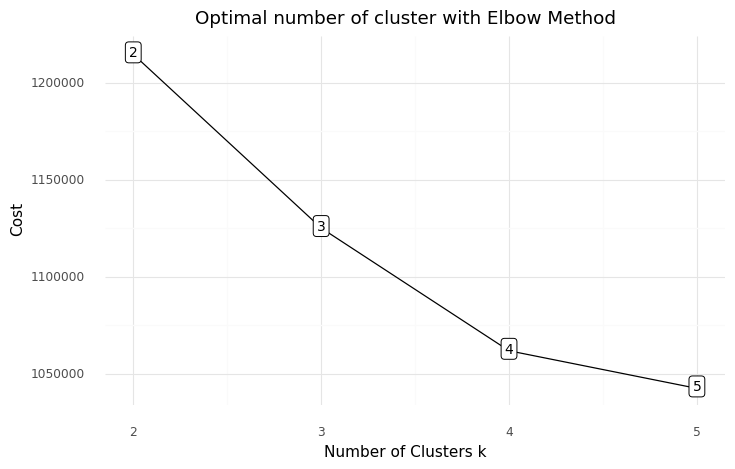

<ggplot: (8782279044633)>

In [113]:

# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

### Optimal number of clusters for Categorical data = 4

In [114]:
kmodes = KModes(n_clusters = 4)
kmodes.fit_predict(df_categorical)
cost=kmodes.cost_
labels_kmode = kmodes.labels_

In [115]:
labels_kmode

array([0, 0, 0, ..., 3, 1, 1], dtype=uint16)

In [116]:
np.unique(labels_kmode, return_counts = True)

(array([0, 1, 2, 3], dtype=uint16), array([176028,  79977,  68033,  51831]))

In [117]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original
162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019
163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019
164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019
165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019
166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019


In [118]:
df_new=df

### Adding cluster labels in the dataframe

In [119]:
df_new['clusters_k_means'] = labels
df_new['clusters_k_mode'] = labels_kmode
df_new.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode
162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,0,0
163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,1,0
164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,0,0
165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,1,0
166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,0,0


In [120]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode
162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,0,0
163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,1,0
164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,0,0
165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,1,0
166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,0,0


## K Prototype for complete dataset

In [121]:
from kmodes.kprototypes import KPrototypes

In [122]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode
162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,0,0
163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,1,0
164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,0,0
165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,1,0
166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,0,0


In [123]:
df =df.iloc[:,0:7]
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date
162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1
163,Audi,Black,10,12,First Avenue,3254,Q1Y1
164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1
165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1
166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375869 entries, 162 to 380638
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Make                375869 non-null  object
 1   Colour              375869 non-null  object
 2   Issue Time          375869 non-null  int64 
 3   Contravention Code  375869 non-null  int64 
 4   Location            375869 non-null  object
 5   PA_Details          375869 non-null  int64 
 6   Issue Date          375869 non-null  object
dtypes: int64(3), object(4)
memory usage: 31.0+ MB


In [125]:
# Inspect the categorical variables
df.select_dtypes('object').nunique()

Make           210
Colour          60
Location      1631
Issue Date      12
dtype: int64

In [126]:
# Inspect the numerical variables
df.describe()

,Issue Time,Contravention Code,PA_Details
count,375869.000000,375869.000000,375869.000000
mean,11.698749,23.073507,1823.647766
std,3.525302,34.907346,758.566191
min,0.000000,1.000000,777.000000
25%,9.000000,2.000000,1433.000000
50%,11.000000,12.000000,1468.000000
75%,14.000000,21.000000,1519.000000
max,23.000000,232.000000,9999.000000


In [127]:
# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Make', 'Colour', 'Location', 'Issue Date']
Categorical columns position  : [0, 1, 4, 6]


In [128]:
# Convert dataframe to matrix
dfMatrix = df.to_numpy()
dfMatrix

array([['Audi', 'Black', 9, ..., 'Antwerp Way', 1500, 'Q1Y1'],
       ['Audi', 'Black', 10, ..., 'First Avenue', 3254, 'Q1Y1'],
       ['Audi', 'Black', 10, ..., 'Ingestre Road', 1498, 'Q1Y1'],
       ...,
       ['YAMAHA', 'WHITE', 16, ..., 'Stratford Multi Storey Car Park',
        1458, 'Q4Y3'],
       ['Yamaha', 'White', 17, ..., 'Westfield Avenue', 1475, 'Q4Y3'],
       ['Yamaha', 'White', 17, ..., 'Harold Road', 3237, 'Q4Y3']],
      dtype=object)

In [129]:
kprototype = KPrototypes(n_clusters = 4)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)


array([2, 1, 2, ..., 2, 2, 1], dtype=uint16)

In [130]:
labels_kprototype = kprototype.labels_

### Adding cluster labels in the dataframe

In [131]:
df_new['clusters_k_prototype'] = labels_kprototype
df_new.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode,clusters_k_prototype
162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,0,0,2
163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,1,0,1
164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,0,0,2
165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,1,0,1
166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,0,0,2


In [132]:
df_new.to_csv('clustered_data.csv')

In [133]:
np.unique(labels, return_counts = True)

(array([0, 1, 2], dtype=int32), array([241777,  80952,  53140]))

In [134]:
type(labels)

numpy.ndarray

### Visualising count of records in each cluster

- "Count of records in each cluster in Clustered data for Numerical Features"

Text(0.5, 1.0, 'Count of records in each cluster in Clustered data for Numerical Features')

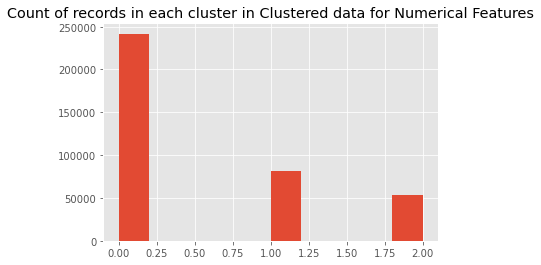

In [135]:
a = np.hstack(labels)
_ = plt.hist(a)  # arguments are passed to np.histogram
plt.title("Count of records in each cluster in Clustered data for Numerical Features")

In [136]:
np.unique(labels_kmode, return_counts = True)

(array([0, 1, 2, 3], dtype=uint16), array([176028,  79977,  68033,  51831]))

- "Count of records in each cluster in Clustered data for Categorical Features"

Text(0.5, 1.0, 'Count of records in each cluster in Clustered data for Categorical Features')

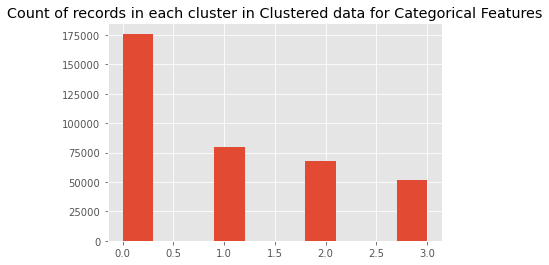

In [137]:
b = np.hstack(labels_kmode)
_ = plt.hist(b)  # arguments are passed to np.histogram
plt.title("Count of records in each cluster in Clustered data for Categorical Features")

In [138]:
np.unique(labels_kprototype, return_counts = True)

(array([0, 1, 2, 3], dtype=uint16), array([ 50161,  80952, 231372,  13384]))

- "Count of records in each cluster in Clustered data for all Features"

Text(0.5, 1.0, 'Count of records in each cluster in Clustered data for all Features')

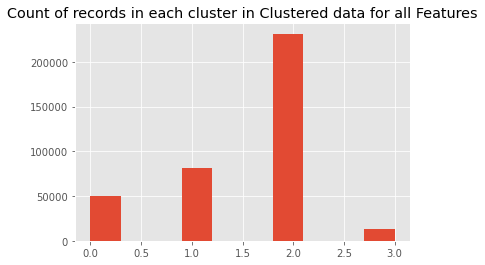

In [139]:
c= np.hstack(labels_kprototype)
_ = plt.hist(c)  # arguments are passed to np.histogram
plt.title("Count of records in each cluster in Clustered data for all Features")

## K MODES Clustering with actual date

In [145]:
## Load Dataset
df2 = pd.read_csv('clustered_data.csv')

df2.head()


,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode,clusters_k_prototype
0,162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,0,0,2
1,163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,1,0,1
2,164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,0,0,2
3,165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,1,0,1
4,166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,0,0,2


In [146]:
df_categorical2  = df2[['Make','Colour',	'Issue Date Original',	'Location']]

In [147]:
df_categorical2.head()

,Make,Colour,Issue Date Original,Location
0,Audi,Black,2-Jan-2019,Antwerp Way
1,Audi,Black,2-Jan-2019,First Avenue
2,Audi,Black,2-Jan-2019,Ingestre Road
3,Audi,Black,2-Jan-2019,Lawrence Road E6
4,Audi,Black,2-Jan-2019,Napier Road E15


### Elbow Method for optimal number of clusters

In [149]:
# Choosing optimal K
cost2 = []
for cluster in range(2, 6):
    try:
        kmodes2 = KModes(n_clusters = cluster)
        kmodes2.fit_predict(df_categorical2)
        cost2.append(kmodes2.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(2, 6), 'Cost': cost2})

Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5


In [150]:
# Import module for data visualization
from plotnine import *
import plotnine
# Data visualization with matplotlib
import matplotlib.pyplot as plt
# Use the theme of ggplot
plt.style.use('ggplot')

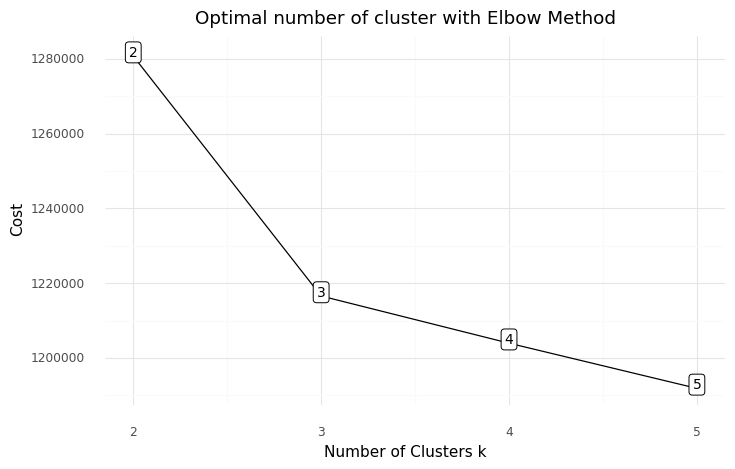

<ggplot: (8782311987501)>

In [151]:

# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

### Optimal number of clusters for Categorical data = 3

In [153]:
kmodes2 = KModes(n_clusters = 3)
kmodes2.fit_predict(df_categorical2)
cost=kmodes2.cost_
labels_kmode2 = kmodes2.labels_

In [154]:
labels_kmode2

array([0, 0, 0, ..., 0, 1, 1], dtype=uint16)

In [155]:
np.unique(labels_kmode2, return_counts = True)

(array([0, 1, 2], dtype=uint16), array([243101,  76372,  56396]))

In [156]:
df2.head()

,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode,clusters_k_prototype
0,162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,0,0,2
1,163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,1,0,1
2,164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,0,0,2
3,165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,1,0,1
4,166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,0,0,2


In [157]:
df_new2=df2

### Adding cluster labels in the dataframe

In [158]:

df_new2['clusters_k_mode'] = labels_kmode2
df_new2.head()

,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode,clusters_k_prototype
0,162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,0,0,2
1,163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,1,0,1
2,164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,0,0,2
3,165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,1,0,1
4,166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,0,0,2


In [159]:
df2.head()

,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode,clusters_k_prototype
0,162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,0,0,2
1,163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,1,0,1
2,164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,0,0,2
3,165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,1,0,1
4,166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,0,0,2


## K Prototype for complete dataset

In [160]:
from kmodes.kprototypes import KPrototypes

In [161]:
df2.head()

,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode,clusters_k_prototype
0,162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,0,0,2
1,163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,1,0,1
2,164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,0,0,2
3,165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,1,0,1
4,166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,0,0,2


In [169]:
df2 =df2[['Make','Colour','Issue Time','Contravention Code','Location','PA_Details','Issue Date Original']]
df2.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date Original
0,Audi,Black,9,19,Antwerp Way,1500,2-Jan-2019
1,Audi,Black,10,12,First Avenue,3254,2-Jan-2019
2,Audi,Black,10,12,Ingestre Road,1498,2-Jan-2019
3,Audi,Black,10,12,Lawrence Road E6,3299,2-Jan-2019
4,Audi,Black,10,12,Napier Road E15,1434,2-Jan-2019


In [170]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375869 entries, 0 to 375868
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Make                 375869 non-null  object
 1   Colour               375869 non-null  object
 2   Issue Time           375869 non-null  int64 
 3   Contravention Code   375869 non-null  int64 
 4   Location             375869 non-null  object
 5   PA_Details           375869 non-null  int64 
 6   Issue Date Original  375869 non-null  object
dtypes: int64(3), object(4)
memory usage: 20.1+ MB


In [171]:
# Inspect the categorical variables
df2.select_dtypes('object').nunique()

Make                    210
Colour                   60
Location               1631
Issue Date Original    1085
dtype: int64

In [172]:
# Inspect the numerical variables
df2.describe()

,Issue Time,Contravention Code,PA_Details
count,375869.000000,375869.000000,375869.000000
mean,11.698749,23.073507,1823.647766
std,3.525302,34.907346,758.566191
min,0.000000,1.000000,777.000000
25%,9.000000,2.000000,1433.000000
50%,11.000000,12.000000,1468.000000
75%,14.000000,21.000000,1519.000000
max,23.000000,232.000000,9999.000000


In [173]:
# Get the position of categorical columns
catColumnsPos2 = [df2.columns.get_loc(col) for col in list(df2.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df2.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos2))

Categorical columns           : ['Make', 'Colour', 'Location', 'Issue Date Original']
Categorical columns position  : [0, 1, 4, 6]


In [174]:
# Convert dataframe to matrix
dfMatrix2 = df2.to_numpy()
dfMatrix2

array([['Audi', 'Black', 9, ..., 'Antwerp Way', 1500, '2-Jan-2019'],
       ['Audi', 'Black', 10, ..., 'First Avenue', 3254, '2-Jan-2019'],
       ['Audi', 'Black', 10, ..., 'Ingestre Road', 1498, '2-Jan-2019'],
       ...,
       ['YAMAHA', 'WHITE', 16, ..., 'Stratford Multi Storey Car Park',
        1458, '31/12/2021'],
       ['Yamaha', 'White', 17, ..., 'Westfield Avenue', 1475,
        '31/12/2021'],
       ['Yamaha', 'White', 17, ..., 'Harold Road', 3237, '31/12/2021']],
      dtype=object)

In [175]:
kprototype2 = KPrototypes(n_clusters = 3)
kprototype2.fit_predict(dfMatrix2, categorical = catColumnsPos)


array([1, 0, 1, ..., 1, 1, 0], dtype=uint16)

In [176]:
labels_kprototype2 = kprototype2.labels_

### Adding cluster labels in the dataframe

In [177]:
df_new2['clusters_k_prototype'] = labels_kprototype2
df_new2.head()

,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Date Original,clusters_k_means,clusters_k_mode,clusters_k_prototype
0,162,Audi,Black,9,19,Antwerp Way,1500,Q1Y1,2-Jan-2019,0,0,1
1,163,Audi,Black,10,12,First Avenue,3254,Q1Y1,2-Jan-2019,1,0,0
2,164,Audi,Black,10,12,Ingestre Road,1498,Q1Y1,2-Jan-2019,0,0,1
3,165,Audi,Black,10,12,Lawrence Road E6,3299,Q1Y1,2-Jan-2019,1,0,0
4,166,Audi,Black,10,12,Napier Road E15,1434,Q1Y1,2-Jan-2019,0,0,1


In [178]:
df_new2.to_csv('clustered_data_with_Actual_date.csv')

### Visualising count of records in each cluster

In [179]:
np.unique(labels_kmode2, return_counts = True)

(array([0, 1, 2], dtype=uint16), array([243101,  76372,  56396]))

- "Count of records in each cluster in Clustered data for Categorical Features"

Text(0.5, 1.0, 'Count of records in each cluster in Clustered data for Categorical Features')

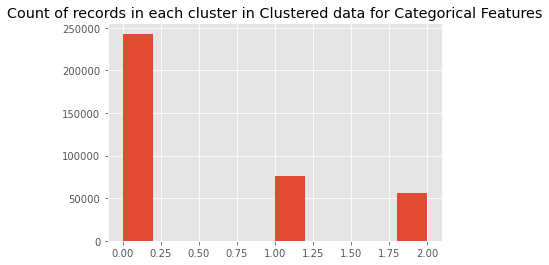

In [180]:
b2 = np.hstack(labels_kmode2)
_ = plt.hist(b2)  # arguments are passed to np.histogram
plt.title("Count of records in each cluster in Clustered data for Categorical Features")

In [181]:
np.unique(labels_kprototype2, return_counts = True)

(array([0, 1, 2], dtype=uint16), array([ 80952, 241777,  53140]))

- "Count of records in each cluster in Clustered data for all Features"

Text(0.5, 1.0, 'Count of records in each cluster in Clustered data for all Features')

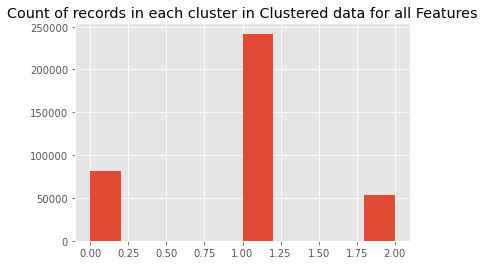

In [182]:
c2= np.hstack(labels_kprototype2)
_ = plt.hist(c2)  # arguments are passed to np.histogram
plt.title("Count of records in each cluster in Clustered data for all Features")